串接 Google Drive

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import Lib

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.data import Dataset
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

## Step 1: Load Data

In [2]:
X = []  # Images
y = []  # Index of class_label
class_label = []

DATASET_DIRECTORY = "/content/gdrive/MyDrive/Colab_Notebooks/African Wildlife"
for folder in os.listdir(DATASET_DIRECTORY):
    folderPath = os.path.join(DATASET_DIRECTORY, folder)
    if not os.path.isdir(folderPath):
        continue
    class_label.append(folder)
    for fileName in os.listdir(folderPath):
        if fileName.endswith("jpg"):
            filePath = os.path.join(folderPath, fileName)
            image = cv2.imread(filePath)
            image = cv2.resize(image, (128, 128))
            X.append(image)
            y.append(len(class_label) - 1)

## Step 2: Data Preparation

In [3]:
X = np.array(X).astype(np.float32) / 255  # 0.0~1.0
y = np.array(y)

In [4]:
# 分割資料
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# 訓練資料集
Training_Data = (
    Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(buffer_size=X_train.shape[0])
    .batch(128)
)

## Step 3: Build Model

In [5]:
# AlexNet Model
model_input = Input(shape=(128, 128, 3))
layer01 = Conv2D(32, (11, 11), strides=4, activation="relu")(model_input)
layer02 = MaxPooling2D((3, 3), 2)(layer01)
layer03 = Conv2D(32, (3, 3), padding="same", activation="relu")(layer02)
layer04 = Conv2D(32, (3, 3), padding="same", activation="relu")(layer03)
layer05 = Conv2D(32, (3, 3), padding="same", activation="relu")(layer04)
layer06 = MaxPooling2D((3, 3), 2)(layer05)
layer07 = Flatten()(layer06)
layer08 = Dense(1024, activation="relu")(layer07)
layer09 = Dense(1024, activation="relu")(layer08)
model_output = Dense(4, activation="softmax")(layer09)

model = Model(inputs=model_input, outputs=model_output)

In [6]:
# 當觀察的值沒有改善則停止訓練
model_early_stop = EarlyStopping(monitor="val_acc", min_delta=0.01, patience=5)

epochs = 50
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model_history = model.fit(
    Training_Data,
    epochs=epochs,
    callbacks=[model_early_stop],
    validation_data=(X_test, y_test),
)
# Save the model as an H5 file
model.save("/content/gdrive/MyDrive/Colab_Notebooks/africa_wildlife_classification.h5")

Epoch 1/50
10/10 [==============================] - 7s 100ms/step - loss: 1.3999 - acc: 0.2708 - val_loss: 1.3718 - val_acc: 0.2458
Epoch 2/50
10/10 [==============================] - 0s 29ms/step - loss: 1.3137 - acc: 0.3767 - val_loss: 1.1901 - val_acc: 0.4684
Epoch 3/50
10/10 [==============================] - 0s 29ms/step - loss: 1.1372 - acc: 0.4675 - val_loss: 1.1414 - val_acc: 0.4817
Epoch 4/50
10/10 [==============================] - 0s 32ms/step - loss: 1.0460 - acc: 0.5075 - val_loss: 0.9867 - val_acc: 0.4917
Epoch 5/50
10/10 [==============================] - 0s 32ms/step - loss: 0.9661 - acc: 0.5333 - val_loss: 0.9486 - val_acc: 0.5681
Epoch 6/50
10/10 [==============================] - 0s 34ms/step - loss: 0.9188 - acc: 0.5717 - val_loss: 0.9376 - val_acc: 0.6047
Epoch 7/50
10/10 [==============================] - 0s 34ms/step - loss: 0.8698 - acc: 0.6000 - val_loss: 0.9134 - val_acc: 0.6047
Epoch 8/50
10/10 [==============================] - 0s 32ms/step - loss: 0.8688 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 4: Evaluate Model

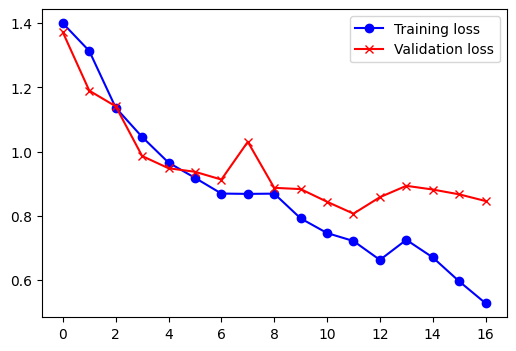

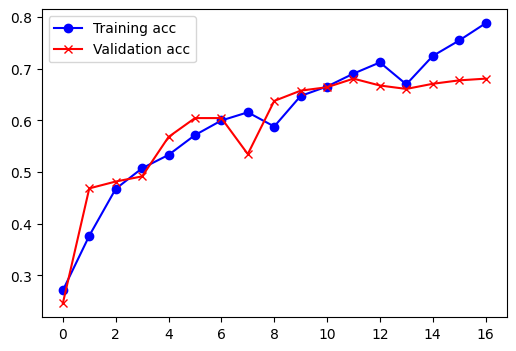

In [9]:
# 空的圖表(6*4)
plt.figure(figsize=(6, 4))
# 繪製訓練損失函數折線圖
plt.plot(
    range(len(model_history.history["loss"])),
    model_history.history["loss"],
    c="blue",
    marker="o",
    label="Training loss",
)
# 繪製驗證損失函數折線圖
plt.plot(
    range(len(model_history.history["val_loss"])),
    model_history.history["val_loss"],
    c="red",
    marker="x",
    label="Validation loss",
)
# 添加圖例
plt.legend()
# 顯示圖形
# plt.show()
# 儲存圖表
plt.savefig("/content/gdrive/MyDrive/Colab_Notebooks/loss_history.png")

# 空的圖表(6*4)
plt.figure(figsize=(6, 4))
# 繪製訓練損失函數折線圖
plt.plot(
    range(len(model_history.history["acc"])),
    model_history.history["acc"],
    c="blue",
    marker="o",
    label="Training acc",
)
# 繪製驗證損失函數折線圖
plt.plot(
    range(len(model_history.history["val_acc"])),
    model_history.history["val_acc"],
    c="red",
    marker="x",
    label="Validation acc",
)
# 添加圖例
plt.legend()
# 顯示圖形
# plt.show()
# 儲存圖表
plt.savefig("/content/gdrive/MyDrive/Colab_Notebooks/acc_history.png")

## Step 5: Deploy Model

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

MODEL_PATH = "/content/gdrive/MyDrive/Colab_Notebooks/africa_wildlife_classification.h5"
model = load_model(MODEL_PATH)

img = cv2.imread(
    "/content/gdrive/MyDrive/Colab_Notebooks/African Wildlife/elephant/001.jpg"
)
img = cv2.resize(img, (128, 128))

# Convert the image to a NumPy array
drawing_array = np.array(img).astype("float")

# Normalize pixel values to be between 0 and 1
drawing_array = drawing_array / 255.0

# Reshape the image to match the model's input shape (1, 28, 28)
drawing_array = np.reshape(drawing_array, (1, 128, 128, 3))

# Predict the digit using the loaded model
digit_prediction = model.predict(drawing_array)

# Get the predicted digit (index of the maximum probability)
predicted_digit = np.argmax(digit_prediction)

print(class_label[predicted_digit])